**Colab환경에서 한글 글꼴 설정**

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from konlpy.tag import Okt                       
from collections import Counter                
import matplotlib                               
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud      

In [ ]:
class WC:                         # WordCloud를 만들 class
  def __init__(self, data):         
    self.data = data              # wordcloud적용할 data
    self.word_count = dict()      # wordcloud에 적용하기 위한 단어 count용 변수
    
  def Processing(self):                         # 사전작업
    message = ''
    for item in self.data:
      message = message + item
    
    nlp = Okt()                     
    message_N = nlp.nouns(message)              # 명사로 추출
    count = Counter(message_N)                  # Count값 계산

    for tag, counts in count.most_common(80):   # word_count(딕셔너리)에 2단어 이상만 저장 
      if(len(str(tag)) > 1):
        self.word_count[tag] = counts
    

  def show(self):                                                                             
    wc = WordCloud('NanumBarunGothic', background_color = 'ivory', width=800, height=600)     # !!!!!!!글꼴 설정 부분!!!!!!!!!!!
    cloud = wc.generate_from_frequencies(self.word_count)
    plt.figure(figsize = (16,16))
    plt.imshow(cloud)
    plt.axis('off')
    plt.savefig('WordCloud.png')
    plt.show

In [ ]:
data = pd.read_csv('/content/data.csv', index_col = 0)
data

,Sentence,label_word,label
0,홍진영 언니 연기 잘 해 얼굴두 이쁘구 노래두 잘 부르구 끼도 많음 나는 퍽,긍정,0
1,그동안 열심히 앞만 보면서 묵묵히 살아왔는데 건강이 많이 안 좋다고 하네 열심히 살...,부정,1
2,나를 떨리게 하나요 부터 완전 끌림 장범준 노래 멋져요,긍정,0
3,도움이 되었습니다 감사합니다,긍정,0
4,똥이 묻었노,욕설,2
...,...,...,...
24733,활기찬 하루를 보내려고 해도 기운이 없어 힘들어,부정,1
24734,요리를 하다가 칼에 손이 많이 베여서 병원에 갔는데 다행히 인대는 안 다쳤데 얼마나...,긍정,0
24735,아직 한국 여자랑 결혼 하는 등신이 있냐,욕설,2
24736,하다하다 데이트 폭력 범을 방송에 소환 하니,욕설,2


In [ ]:
a = WC(data.Sentence)

In [ ]:
a.Processing()

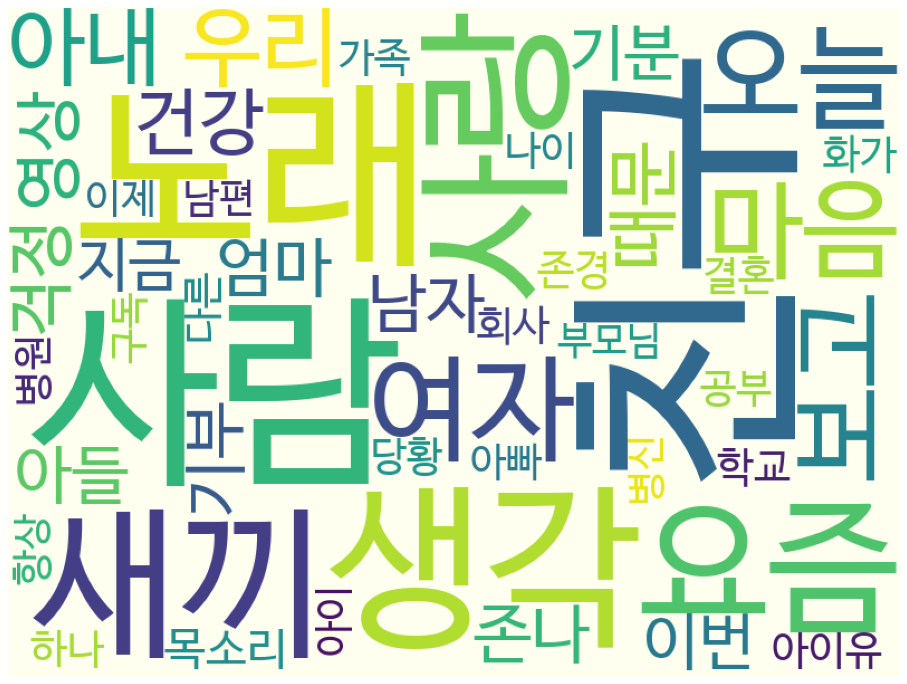

In [ ]:
a.show()

In [ ]:
class PIE:
  def __init__(self, data):                                                                                                  # 데이터가 label_word칼럼으로 구성되어 있음
    self.label = list(data.label_word.unique())
    self.ratio = list(data.groupby('label_word').size())
    self.explode = []

  def Set_explode(self):
    for i in range(len(self.label)):
      self.explode.append(0.08)
    
  def show(self):
    plt.rc('font', family='NanumBarunGothic')                                                                                 # !!!!!!!글꼴 설정 부분!!!!!!!!!!!
    wed = {'edgecolor' : 'black', 'linewidth' : 1.5}
    plt.pie(self.ratio, labels = self.label, autopct = '%.1f%%', explode = self.explode, shadow = True, wedgeprops = wed)
    plt.legend(loc = (1, 0.5))
    plt.figure(figsize = (20,20))
    plt.savefig('PieChart.png')
    plt.show()

In [ ]:
p = PIE(data)

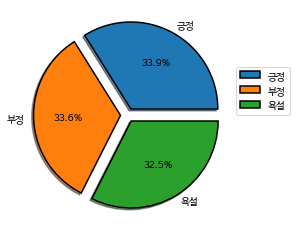

<Figure size 1440x1440 with 0 Axes>

In [ ]:
p.Set_explode()
p.show()

In [ ]:
class LINE:
  def __init__(self, data):
    self.data = data
    self.x = []
    self.day = []
    self.y = []
    
  def Set_x(self):                                                          # x축값 설정
    self.x = list(self.data.Date.unique())
    
  def Set_day(self):                                                        # x축값 별로 label 개수 저장
    for i in range(len(self.x)):
      cnt1, cnt2, cnt3 = 0, 0, 0
      for date, label in zip(self.data['Date'], self.data['label']):
        if date == self.x[i]:
          if label == '긍정':                                                # 긍정 / 부정/ 욕설로 구성된 데이터 사용함(label에 맞게 변경)
            cnt1 += 1
          elif label == '부정':
            cnt2 += 1
          elif label == '악플':
            cnt3 += 1
      
      data = str(cnt1) + ' ' + str(cnt2) + ' ' + str(cnt3)
      self.day.append(list(map(int, data.split())))
    

  def Set_y(self):                                                              # y축값 설정 ex)  1월 20일 [10, 20, 30]     --> [[10, 1], [20, 2], [30, 3]] 이런식으로 변경
    for i in range(len(self.x)):                                                #                 1월 21일 [1, 2, 3]
      y = ''
      for j in range(len(self.day)):
        y += str(self.day[j][i]) + ' '

      self.y.append(list(map(int, y.split())))


  def show(self):
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot()

    for i in range(len(self.y)):
      ax.plot(self.x, self.y[i], marker = 'o')

    plt.rc('font', family='NanumBarunGothic')
    ax.legend(['긍정', '부정', '악플'])
    plt.savefig('LineChart.png')
    plt.show()


In [ ]:
data2 = pd.read_csv('/content/MultiCrawling.csv', index_col = 0)

In [ ]:
L = LINE(data2)

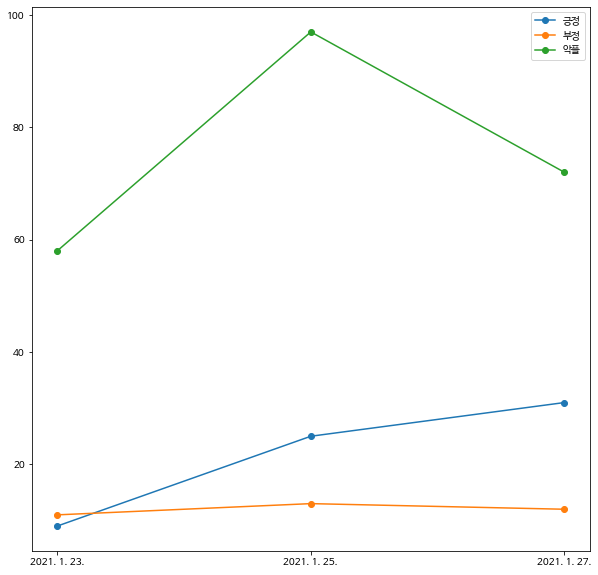

In [ ]:
L.Set_x()
L.Set_day()
L.Set_y()

L.show()